In [1]:
%%javascript
Jupyter.notebook.config.update({
  'load_extensions': { 'vim_binding/vim_binding': true },
});

<IPython.core.display.Javascript object>

In [4]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

# scale function to make sure we have a range from 0.01 to 0.99
# sigmoid goes from > 0 to < 1
scale = lambda i: (numpy.asfarray(i) / 255.0 * 0.99) + 0.01

## Sigmoid function

\begin{equation*}
y = \frac{1}{1 + e^{-x}}
\end{equation*}

## Weight update

\begin{equation*}
\Delta W_{jk} = \alpha \cdot E_k \cdot O_k(1 - O_k) \cdot O_j^T
\end{equation*}

\begin{equation*}
\frac{\partial E}{\partial w_{jk}} = -(t_k - o_k) \cdot sigmoid(\sum_j w_{jk} \cdot o_j)(1 - sigmoid(\sum_{j} w_{jk} \cdot o_j)) \cdot o_j
\end{equation*}

## Sigmoid function

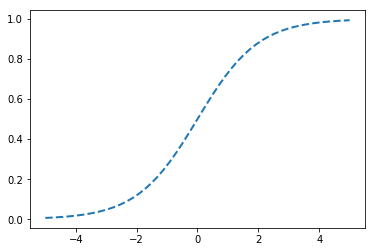

In [87]:
x = numpy.linspace(-5, 5)
line = plt.plot(x, scipy.special.expit(x), '--', linewidth=2)

# Neural Network Implementation

The weights inside the neural network carry state


In [6]:
class NeuralNetwork:
    def __init__(self, n_inputnodes, n_hiddennodes, n_outputnodes, learning_rate):
        self.learning_rate = learning_rate
      
        self.wih = self._init_rnd_weights(n_inputnodes, n_hiddennodes)
        self.who = self._init_rnd_weights(n_hiddennodes, n_outputnodes)

        self.activation_function = scipy.special.expit
        self.inverse_activation_function = scipy.special.logit
        
    def _init_rnd_weights(self, n_layer_1, n_layer_2):
        weights = numpy.random.normal(0.0, pow(n_layer_1, -0.5), (n_layer_2, n_layer_1)) 
        
        return weights
        
    def _calc_layer(self, weights, inputs):
        weighted_inputs = numpy.dot(weights, inputs)
        outputs = self.activation_function(weighted_inputs)
        
        return outputs

    def _backprop(self, errors, outputs, inputs):
        error_delta = self.learning_rate * numpy.dot(
            (errors * outputs * (1.0 - outputs)), 
            inputs.T)
        
        return error_delta
        
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
      
        hidden_outputs = self._calc_layer(self.wih, inputs)
        final_outputs = self._calc_layer(self.who, hidden_outputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self._backprop(output_errors, final_outputs, hidden_outputs)
        self.wih += self._backprop(hidden_errors, hidden_outputs, inputs)
        
        pass
   
    def query(self, inputs_list):
        # convert input into 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
       
        hidden_outputs = self._calc_layer(self.wih, inputs)
        final_outputs = self._calc_layer(self.who, hidden_outputs)
        
        return final_outputs
  
    # scale values to sth between 0.01 and 0.99
    def _scale_values(self, values):
        # to 0
        values -= numpy.min(values)
        # to 1
        values /= numpy.max(values)
        # bump it up to 0.01 - 0.99
        values *= 0.98
        values += 0.01
        
        pass

    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        self._scale_values(hidden_outputs)
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        self._scale_values(inputs)
        
        return inputs

# Initialize NN

Using a specified number of input, hidden and output nodes and a learning_rate.

In [8]:
no_of_output_nodes = 10
no_of_input_nodes = 28 * 28
no_of_hidden_nodes = 200
learning_rate = 0.1
nn = NeuralNetwork(no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, learning_rate)

# Helper functions

In [69]:
def get_scaled_inputs(record):
    fields = record.split(',')
    pixels = fields[1:]
    return (numpy.asfarray(pixels) / 255.0) * 0.99 + 0.01

def train(network, epochs, records):
    for e in range(epochs): 
        for record in records:
            label = get_label(record)
            inputs = get_scaled_inputs(record)
            targets = numpy.zeros(no_of_output_nodes) + 0.01
            targets[int(label)] = 0.99
            network.train(inputs, targets)
    pass

def get_label(record):
    fields = record.split(',')
    return fields[0]

def render_record(record):
    fields = record.split(',')
    label, pixels = fields[0], fields[1:]
    image_array = numpy.asfarray(pixels).reshape((28, 28))
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    pass

def is_match(network, record):
    label = get_label(record)
    target_number = int(label)
    inputs = get_scaled_inputs(record) 
    outputs = network.query(inputs)
    result = numpy.argmax(outputs)
    return 1 if result == target_number else 0

def get_scores(network, records):
    return [is_match(network, record) for record in records]

# MNIST

## Small data set

### Load

In [70]:
small_training_data_file = open("mnist_train_100.csv", 'r')
#small_training_data_file = open("zalando/mnist_train_100.csv", 'r')
small_training_records = small_training_data_file.readlines()
small_training_data_file.close()

small_test_data_file = open("mnist_test_10.csv", 'r')
#small_test_data_file = open("zalando/mnist_test_10.csv", 'r')
small_test_records = small_test_data_file.readlines()
small_test_data_file.close()

### Render train sample

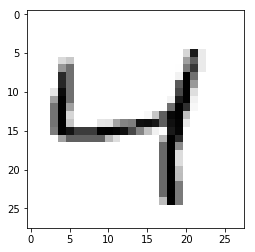

In [71]:
sample_training_record = small_training_records[2]
render_record(sample_training_record)

### Train

In [72]:
train(network=nn, epochs=5, records=small_training_data_lines)

### Render test sample

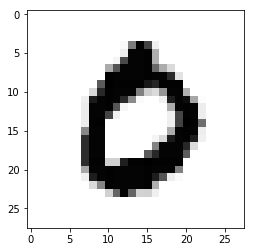

In [73]:
sample_test_record = small_test_records[3]
render_record(sample_test_record)

### Scores

In [80]:
inputs = get_scaled_inputs(sample_test_record)
label = get_label(sample_test_record)
outputs = nn.query(inputs)
output_value = numpy.argmax(outputs)
certainty = outputs[output_value][0]
print "test value {} is {} with {:f} certainty".format(label, output_value, certainty)

test value 0 is 0 with 0.771757 certainty


In [81]:
scores = get_scores(nn, small_test_records)
print "all-over accuracy = {}".format(float(numpy.asarray(scores).sum()) / len(scores))

all-over accuracy = 0.7


## Full data set

### Load

In [90]:
#full_training_data_file = open("mnist_train.csv", 'r')
full_training_data_file = open("zalando/mnist_train.csv", 'r')
full_training_records = full_training_data_file.readlines()
full_training_data_file.close()

#full_test_data_file = open("mnist_test.csv", 'r')
full_test_data_file = open("zalando/mnist_test.csv", 'r')
full_test_records = full_test_data_file.readlines()
full_test_data_file.close()

### Train

In [92]:
train(network=nn, epochs=5, records=full_training_records)

### Scores

In [94]:
scores = get_scores(nn, full_test_records)
print "all-over accuracy = {}".format(float(numpy.asarray(scores).sum()) / len(scores))

all-over accuracy = 0.8141


# Try with different learning rate/epoch parameters

In [195]:
learning_rate = 0.2
no_of_hidden_nodes = 200
nn2 = NeuralNetwork(no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, learning_rate)

train(network=nn2, epochs=10, data_list=small_training_data_lines)

scores = get_scores(nn2, full_test_records)
"accuracy = {:f}".format(float(numpy.asarray(scores).sum()) / len(scores))

'accuracy = 0.500000'

# Backquery test

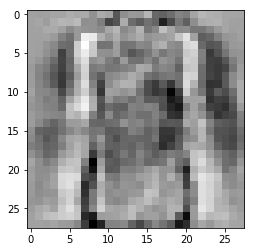

In [104]:
# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(no_of_output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99

# get image data
image_data = nn.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')